## Levered Returns (Part 2)

##### Hypothesis: For (highly) profitable investment: the more leverage, the better?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")

In [2]:
Ved = pd.read_csv("Ved.csv", index_col = "Date", parse_dates=["Date"])
Ved

,Price,Returns
Date,,
2014-01-01,202.000000,NaN
2014-01-02,199.850006,-0.010644
2014-01-03,199.149994,-0.003503
2014-01-06,198.949997,-0.001004
2014-01-07,194.500000,-0.022367
...,...,...
2024-01-31,273.850006,0.028545
2024-02-01,268.500000,-0.019536
2024-02-02,272.549988,0.015084


In [3]:
Ved["Simple_Ret"] = Ved.Price.pct_change() #simple returns

In [4]:
leverage = 2
#leverage = 7

### (Simplified) Assumptions:

    . Restore leverage on a daily basis (by buying/selling shares)
    . no trading costs
    . no borrowing costs

In [5]:
Ved["Lev_Returns"] = Ved.Simple_Ret.mul(leverage) # Levered simple returns
Ved   

,Price,Returns,Simple_Ret,Lev_Returns
Date,,,,
2014-01-01,202.000000,NaN,NaN,NaN
2014-01-02,199.850006,-0.010644,-0.010644,-0.021287
2014-01-03,199.149994,-0.003503,-0.003503,-0.007005
2014-01-06,198.949997,-0.001004,-0.001004,-0.002009
2014-01-07,194.500000,-0.022367,-0.022367,-0.044735
...,...,...,...,...
2024-01-31,273.850006,0.028545,0.028545,0.057089
2024-02-01,268.500000,-0.019536,-0.019536,-0.039073
2024-02-02,272.549988,0.015084,0.015084,0.030168


In [6]:
# Ved["Lev_returns"] = np.where(Ved["Lev_Returns"]) < -1, -1, Ved["Lev_returns"] # Limit loss to 100%

In [7]:
Ved

,Price,Returns,Simple_Ret,Lev_Returns
Date,,,,
2014-01-01,202.000000,NaN,NaN,NaN
2014-01-02,199.850006,-0.010644,-0.010644,-0.021287
2014-01-03,199.149994,-0.003503,-0.003503,-0.007005
2014-01-06,198.949997,-0.001004,-0.001004,-0.002009
2014-01-07,194.500000,-0.022367,-0.022367,-0.044735
...,...,...,...,...
2024-01-31,273.850006,0.028545,0.028545,0.057089
2024-02-01,268.500000,-0.019536,-0.019536,-0.039073
2024-02-02,272.549988,0.015084,0.015084,0.030168


In [8]:
Ved[["Returns", "Lev_Returns"]]#.add(1)

,Returns,Lev_Returns
Date,,
2014-01-01,NaN,NaN
2014-01-02,-0.010644,-0.021287
2014-01-03,-0.003503,-0.007005
2014-01-06,-0.001004,-0.002009
2014-01-07,-0.022367,-0.044735
...,...,...
2024-01-31,0.028545,0.057089
2024-02-01,-0.019536,-0.039073
2024-02-02,0.015084,0.030168


In [9]:
Ved[["Returns", "Lev_Returns"]].add(1)

,Returns,Lev_Returns
Date,,
2014-01-01,NaN,NaN
2014-01-02,0.989356,0.978713
2014-01-03,0.996497,0.992995
2014-01-06,0.998996,0.997991
2014-01-07,0.977633,0.955265
...,...,...
2024-01-31,1.028545,1.057089
2024-02-01,0.980464,0.960927
2024-02-02,1.015084,1.030168


In [10]:
Ved[["Returns", "Lev_Returns"]].add(1).cumprod()

,Returns,Lev_Returns
Date,,
2014-01-01,NaN,NaN
2014-01-02,0.989356,0.978713
2014-01-03,0.985891,0.971857
2014-01-06,0.984901,0.969905
2014-01-07,0.962871,0.926516
...,...,...
2024-01-31,1.355693,0.238022
2024-02-01,1.329208,0.228722
2024-02-02,1.349257,0.235622


In [11]:
0.978713*0.969905*0.971857

0.9225436465771661

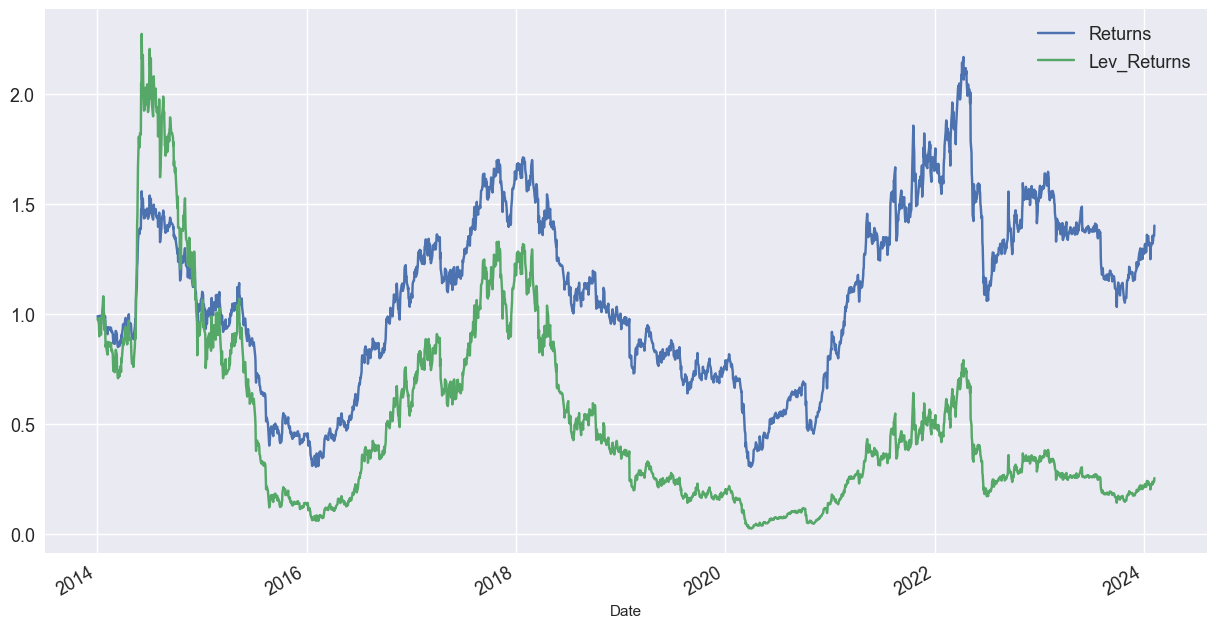

In [12]:
Ved[["Returns", "Lev_Returns"]].add(1).cumprod().plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [13]:
Ved.Simple_Ret.max()

0.18577075098814233

In [14]:
Ved.Lev_Returns.max()

0.37154150197628466

In [15]:
Ved.Simple_Ret.min()

-0.2043496252580359

In [16]:
Ved.Lev_Returns.min()

-0.4086992505160718

### What happens when leverage greater than....?

In [17]:
-1 / Ved.Simple_Ret.min()

4.893573936028912

### Take Home: 
1. With leverage you can (Theoretically) lose more than the initial Margin (In practice: margin call / margin closeout before)
2. Even for (highly) profitable instruments: "The more leverage the better" does not hold.
3. It's a two edged (non-symmetrical) sword: Leverage amplifies losses more than it amplifies gains.